In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

from datetime import datetime

%matplotlib inline

#每次可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

members.csv
sample_submission.csv
song_extra_info.csv
songs.csv
test.csv
train.csv



# Data Clean

## members

In [2]:
members = pd.read_csv('../input/members.csv', dtype={'city' : 'category',
                                                     'bd' : 'category',
                                                     'registered_via' : 'category',
                                                     'gender' : 'category'})
members.shape
members.head(5)

(34403, 7)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [116]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null category
bd                        34403 non-null category
gender                    14501 non-null category
registered_via            34403 non-null category
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: category(4), int64(2), object(1)
memory usage: 945.0+ KB


In [117]:
members.registration_init_time = members.registration_init_time.apply(lambda x : datetime.strptime(str(x),'%Y%m%d'))

members.expiration_date = members.expiration_date.apply(lambda x : datetime.strptime(str(x),'%Y%m%d'))

In [118]:
cal_days = lambda x : x.expiration_date - x.registration_init_time

members['registration_days'] = members.apply(cal_days, axis=1)

In [119]:
members.head(5)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_days
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20,2223 days
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22,725 days
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12,457 days
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07,1 days
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13,138 days


In [120]:
members.gender = members.gender.map({'male' : 1, 'female' : 2})
gender_full = np.random.randint(1, 3, members.gender.isnull().sum())
members.gender[members.gender.isnull() == True] = gender_full
del gender_full

/usr/local/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
members.to_csv('./input/members.csv')

del members

## songs and song_extra_info

In [2]:
songs = pd.read_csv('../input/songs.csv', dtype={'genre_ids' : 'category',
                                                 'language' : 'category'})
song_extra_info = pd.read_csv('../input/song_extra_info.csv')

songs.shape
songs.head(5)
song_extra_info.shape
song_extra_info.head(5)

(2296320, 7)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


(2295971, 3)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [3]:
songs = songs.merge(song_extra_info, left_on='song_id', right_on='song_id')

del song_extra_info

In [124]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295422 entries, 0 to 2295421
Data columns (total 9 columns):
song_id        object
song_length    int64
genre_ids      category
artist_name    object
composer       object
lyricist       object
language       category
name           object
isrc           object
dtypes: category(2), int64(1), object(6)
memory usage: 146.7+ MB


In [125]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94073
artist_name          0
composer       1070932
lyricist       1944498
language             1
name                 2
isrc            136530
dtype: int64

In [126]:
songs.language = songs.language.fillna(songs.language[1])
songs.name = songs.name.fillna('Intro')

In [127]:
songs.to_csv('./input/songs.csv')

del songs

## train and test

In [2]:
train = pd.read_csv('../input/train.csv', dtype={'target' : 'category'})
test = pd.read_csv('../input/test.csv')

train.shape
train.head(5)
test.shape
test.head(5)

(7377418, 6)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


(2556790, 6)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [3]:
train['id'] = -1
full_data = pd.concat([train, test])

del train
del test

full_data.head()

,id,msno,song_id,source_screen_name,source_system_tab,source_type,target
0,-1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,Explore,explore,online-playlist,1
1,-1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,Local playlist more,my library,local-playlist,1
2,-1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,Local playlist more,my library,local-playlist,1
3,-1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,Local playlist more,my library,local-playlist,1
4,-1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,Explore,explore,online-playlist,1


In [4]:
full_data.isnull().sum()

id                          0
msno                        0
song_id                     0
source_screen_name     577687
source_system_tab       23467
source_type             28836
target                2556790
dtype: int64

In [4]:
def three_null(x):
    if (type(x.source_screen_name) == str) and (type(x.source_system_tab) == str) and (type(x.source_type) == str):
        return 0
        
    elif (type(x.source_screen_name) == float) and (type(x.source_system_tab) == str) and (type(x.source_type) == str):
        return 11
    elif (type(x.source_screen_name) == str) and (type(x.source_system_tab) == float) and (type(x.source_type) == str):
        return 12
    elif (type(x.source_screen_name) == str) and (type(x.source_system_tab) == str) and (type(x.source_type) == float):
        return 13
        
    elif (type(x.source_screen_name) == float) and (type(x.source_system_tab) == float) and (type(x.source_type) == str):
        return 212
    elif (type(x.source_screen_name) == float) and (type(x.source_system_tab) == str) and (type(x.source_type) == float):
        return 213
    elif (type(x.source_screen_name) == str) and (type(x.source_system_tab) == float) and (type(x.source_type) == float):
        return 223
        
    elif (type(x.source_screen_name) == float) and (type(x.source_system_tab) == float) and (type(x.source_type) == float):
        return 3

full_data['three_null'] = full_data.apply(three_null, axis=1)
    
full_data.head()

,id,msno,song_id,source_screen_name,source_system_tab,source_type,target,three_null
0,-1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,Explore,explore,online-playlist,1,0
1,-1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,Local playlist more,my library,local-playlist,1,0
2,-1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,Local playlist more,my library,local-playlist,1,0
3,-1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,Local playlist more,my library,local-playlist,1,0
4,-1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,Explore,explore,online-playlist,1,0


In [5]:
full_data.to_csv('./input/full_data_fillThree.csv')

In [2]:
full_data = pd.read_csv('./input/full_data_fillThree.csv')

In [3]:
def fill_three(x):
    if x.three_null == 11:
        for i in range(x.name)[::-1]:
            if (full_data.iloc[i].three_null == 0) and (full_data.iloc[i].source_system_tab == x.source_system_tab) and (full_data.iloc[i].source_type == x.source_type):
                return [full_data.iloc[i].source_screen_name, x.source_system_tab, x.source_type, 0]
    elif x.three_null == 12:
        for i in range(x.name)[::-1]:
            if (full_data.iloc[i].three_null == 0) and (full_data.iloc[i].source_screen_name == x.source_screen_name) and (full_data.iloc[i].source_type == x.source_type):
                return [x.source_screen_name, full_data.iloc[i].source_system_tab, x.source_type, 0]
    elif x.three_null == 13:
        for i in range(x.name)[::-1]:
            if (full_data.iloc[i].three_null == 0) and (full_data.iloc[i].source_screen_name == x.source_screen_name) and (full_data.iloc[i].source_system_tab == x.source_system_tab):
                return [x.source_screen_name, x.source_system_tab, full_data.iloc[i].source_type, 0]
                    
    elif x.three_null == 223:
        for i in range(x.name)[::-1]:
            if (full_data.iloc[i].source_screen_name == x.source_screen_name):
                if type(full_data.iloc[i].source_system_tab) == str:
                    return [x.source_screen_name, full_data.iloc[i].source_system_tab, x.source_type, 13]
                if type(full_data.iloc[i].source_type) == str:
                    return [x.source_screen_name, full_data.iloc[i].source_system_tab, x.source_type, 12]
    elif x.three_null == 213:
        for i in range(x.name)[::-1]:
            if (full_data.iloc[i].source_system_tab == x.source_system_tab):
                if type(full_data.iloc[i].source_screen_name) == str:
                    return [full_data.iloc[i].source_screen_name, x.source_system_tab, x.source_type, 13]
                if type(full_data.iloc[i].source_type) == str:
                    return [x.source_screen_name, x.source_system_tab, full_data.iloc[i].source_type, 11]
    elif x.three_null == 212:
        for i in range(x.name)[::-1]:
            if (full_data.iloc[i].source_type == x.source_type):
                if type(full_data.iloc[i].source_screen_name) == str:
                    return [full_data.iloc[i].source_screen_name, x.source_system_tab, x.source_type, 12]
                if type(full_data.iloc[i].source_system_tab) == str:
                    return [x.source_screen_name, full_data.iloc[i].source_system_tab, x.source_type, 11]
                            
    elif x.three_null == 3:
        for i in range(x.name)[::-1]:
            if type(full_data.iloc[i].source_screen_name) == str:
                return [full_data.iloc[i].source_screen_name, x.source_system_tab, x.source_type, 223]
            if type(full_data.iloc[i].source_system_tab) == str:
                return [x.source_screen_name, full_data.iloc[i].source_system_tab, x.source_type, 213]
            if type(full_data.iloc[i].source_type) == str:
                return [x.source_screen_name, x.source_system_tab, full_data.iloc[i].source_type, 212]

In [ ]:
full_data[full_data.three_null != 0].sum()

In [ ]:
full_data.isnull().sum()

In [ ]:
full_data.iloc[i, 3] = full_data.apply(fill_three[0], axis=1)

full_data.iloc[i, 3] = a[0]
full_data.iloc[i, 4] = a[1]
full_data.iloc[i, 5] = a[2]
full_data.iloc[i, 7] = a[3]

In [ ]:
full_data.to_csv('./input/full_data_fillThreeEd.csv')

In [129]:
train.isnull().sum()
test.isnull().sum()

msno                       0
song_id                    0
source_system_tab      18371
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

id                         0
msno                       0
song_id                    0
source_system_tab       5096
source_screen_name    162883
source_type             7297
dtype: int64

In [130]:
train.source_system_tab.value_counts()
train.source_screen_name.value_counts()
train.source_type.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
null               6478
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

In [131]:
test.source_system_tab.value_counts()
test.source_screen_name.value_counts()
test.source_type.value_counts()

my library      1019492
discover         871068
search           277615
radio            212765
listen with       98628
explore           66023
null               3346
notification       2124
settings            633
Name: source_system_tab, dtype: int64

Local playlist more     845115
Online playlist more    529807
Radio                   211201
Album more              176129
Search                  121982
Artist more             110999
Discover Feature         93401
Others profile more      90457
Discover Chart           78999
Discover Genre           41617
Explore                  27872
My library               25559
Unknown                  23620
Discover New              5277
Search Trends             4883
Search Home               4705
My library_Search         2114
Self profile more          131
Concert                     13
People local                13
Payment                     12
People global                1
Name: source_screen_name, dtype: int64

online-playlist           774532
local-library             582346
local-playlist            294537
radio                     215164
album                     195190
top-hits-for-artist       179360
song                      129153
song-based-playlist        87179
listen-with                84499
topic-article-playlist      5082
my-daily-playlist           2023
artist                       428
Name: source_type, dtype: int64

/usr/local/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


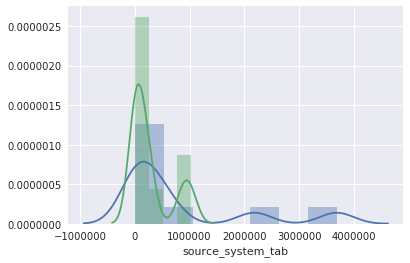

In [132]:
sns.distplot(train.source_system_tab.value_counts(), label='train')
sns.distplot(test.source_system_tab.value_counts(), label='test')

/usr/local/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


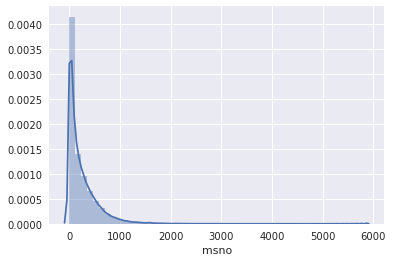

In [133]:
sns.distplot(train.msno.value_counts())

In [134]:
train.source_system_tab = train.source_system_tab.fillna('my library')
train.source_screen_name = train.source_screen_name.fillna('Local playlist more')
train.source_type = train.source_type.fillna('local-library')

test.source_system_tab = test.source_system_tab.fillna('my library')
test.source_screen_name = test.source_screen_name.fillna('Local playlist more')
test.source_type = test.source_type.fillna('local-library')

In [135]:
tab = pd.get_dummies(train.source_system_tab)
tab_col = []
for column in tab.columns:
    tab_col.append('tab_' + column)
tab.columns = tab_col
train = train.drop(['source_system_tab'], axis=1)
train = train.join(tab)

name = pd.get_dummies(train.source_screen_name)
name_col = []
for column in name.columns:
    name_col.append('name_' + column)
name.columns = name_col
train = train.drop(['source_screen_name'], axis=1)
train = train.join(name)

ttype = pd.get_dummies(train.source_type)
ttype_col = []
for column in ttype.columns:
    ttype_col.append('type_' + column)
ttype.columns = ttype_col
train = train.drop(['source_type'], axis=1)
train = train.join(ttype)

tab = pd.get_dummies(test.source_system_tab)
tab_col = []
for column in tab.columns:
    tab_col.append('tab_' + column)
tab.columns = tab_col
test = test.drop(['source_system_tab'], axis=1)
test =test.join(tab)

name = pd.get_dummies(test.source_screen_name)
name_col = []
for column in name.columns:
    name_col.append('name_' + column)
name.columns = name_col
test = test.drop(['source_screen_name'], axis=1)
test = test.join(name)

ttype = pd.get_dummies(test.source_type)
ttype_col = []
for column in ttype.columns:
    ttype_col.append('type_' + column)
ttype.columns = ttype_col
test = test.drop(['source_type'], axis=1)
test = test.join(ttype)

train.head()

,msno,song_id,target,tab_discover,tab_explore,tab_listen with,tab_my library,tab_notification,tab_null,tab_radio,...,type_listen-with,type_local-library,type_local-playlist,type_my-daily-playlist,type_online-playlist,type_radio,type_song,type_song-based-playlist,type_top-hits-for-artist,type_topic-article-playlist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [136]:
[col for col in test.columns if col not in train.columns]

['id', 'name_People global', 'name_People local']

In [137]:
train['name_People global'] = 0
train['name_People local'] = 0

test = test.drop(['id'], axis=1)

In [138]:
train.to_csv('./input/train.csv')
test.to_csv('./input/test.csv')

del train
del test